In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [6]:
train_original = train.copy()
test_original = test.copy()
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [10]:
train.shape, test.shape

((614, 13), (367, 12))

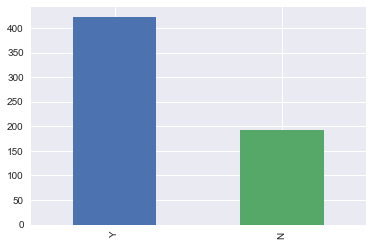

In [12]:
train['Loan_Status'].value_counts().plot.bar()

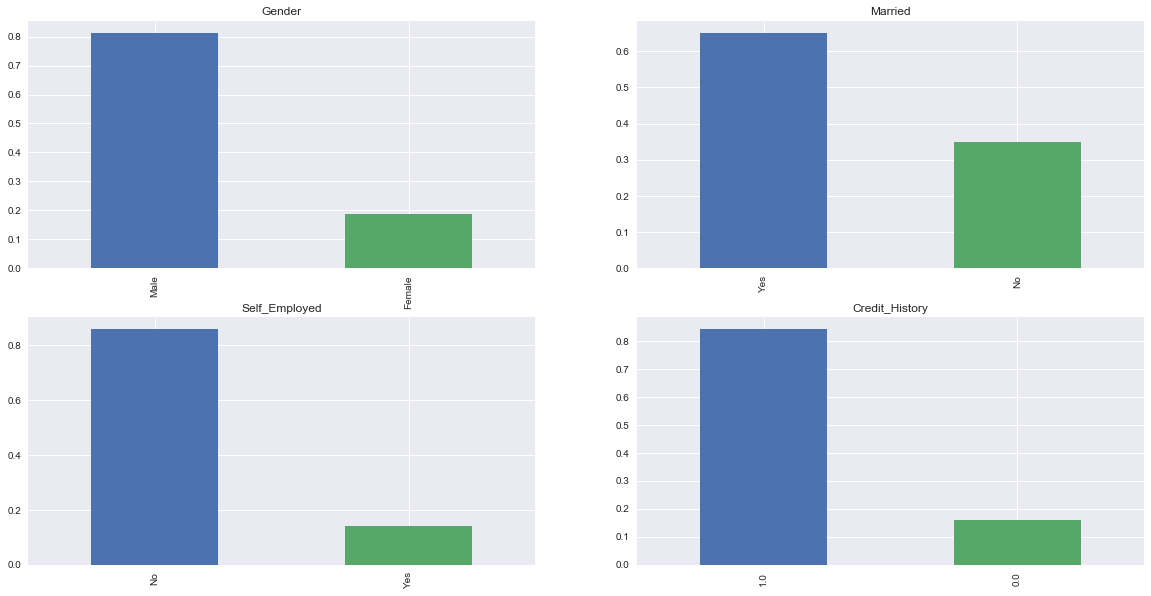

In [13]:
#Independent Variable-Categorical
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Gender')
plt.subplot(222) 
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.subplot(223) 
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
plt.subplot(224) 
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 
plt.show()

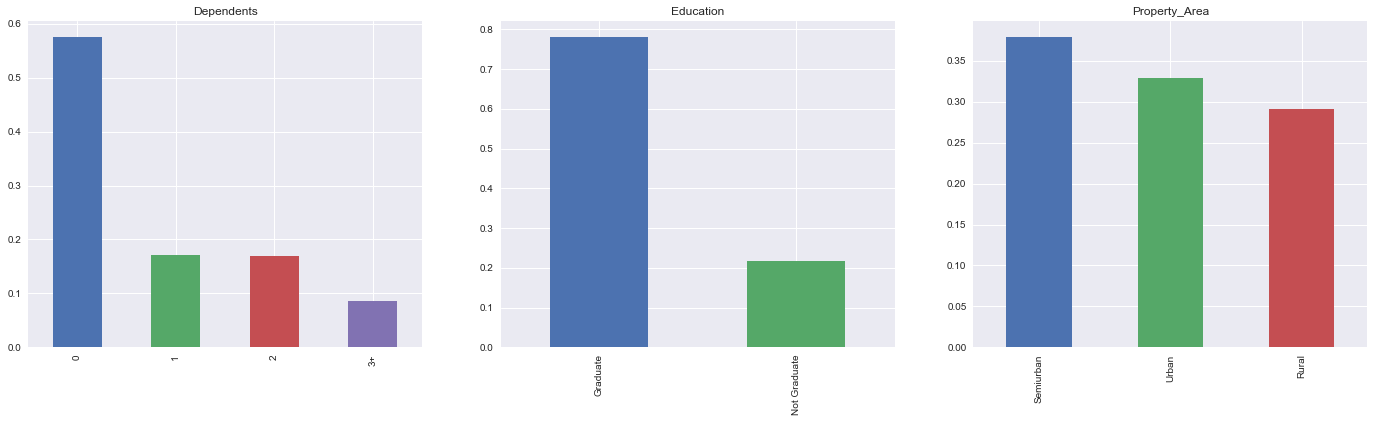

In [14]:
#Independent Variable-Ordinal
plt.figure(1)
plt.subplot(131) 
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents') 
plt.subplot(132) 
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 
plt.subplot(133) 
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 
plt.show()

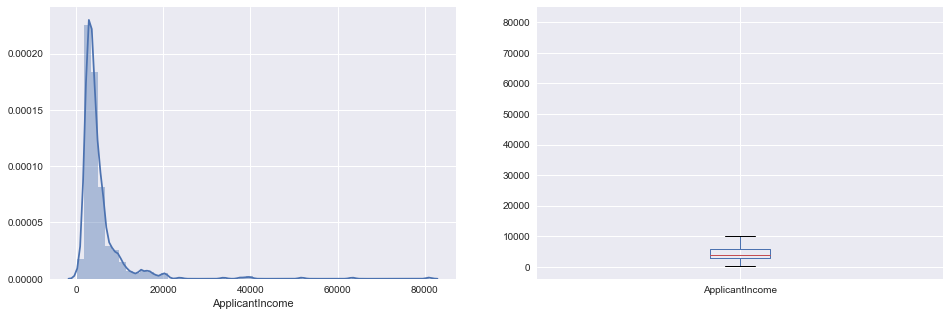

In [18]:
#Independent Variable-Numerical
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['ApplicantIncome'])
plt.subplot(122) 
train['ApplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

Text(0.5,0.98,'')

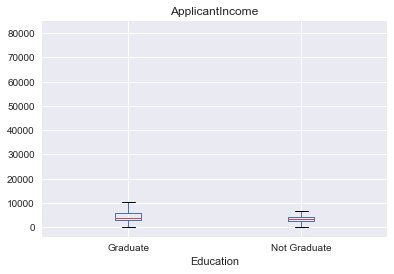

In [20]:
#Segregating Applicant Income by Education
train.boxplot(column='ApplicantIncome', by = 'Education')
plt.suptitle("")

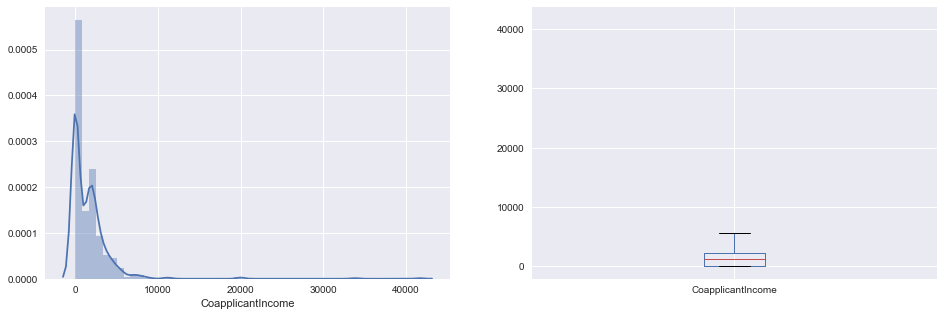

In [21]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122) 
train['CoapplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

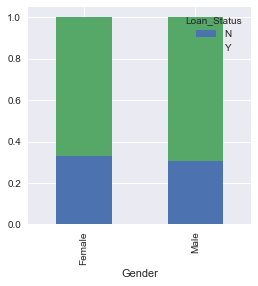

In [27]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status']) 
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

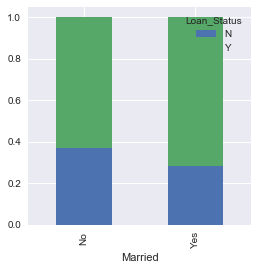

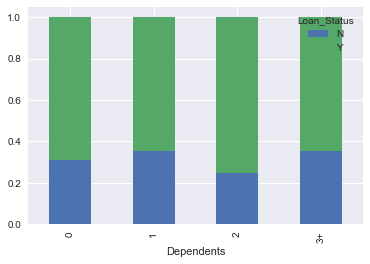

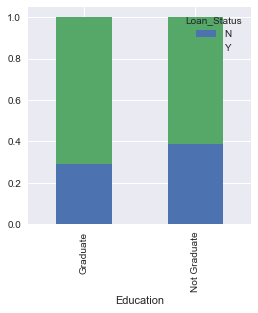

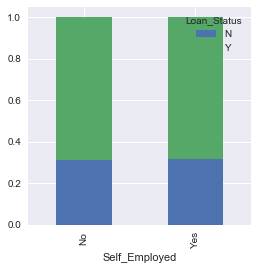

In [28]:
Married=pd.crosstab(train['Married'],train['Loan_Status']) 
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status']) 
Education=pd.crosstab(train['Education'],train['Loan_Status']) 
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status']) 
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show() 
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show()

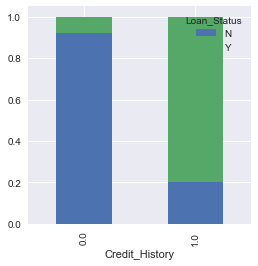

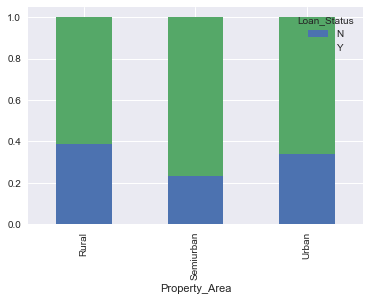

In [29]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status']) 
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status']) 
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show()

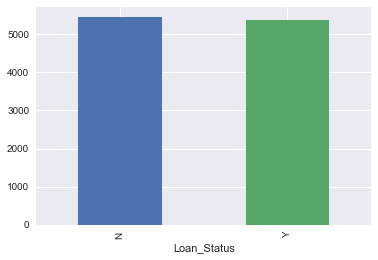

In [30]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [31]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)

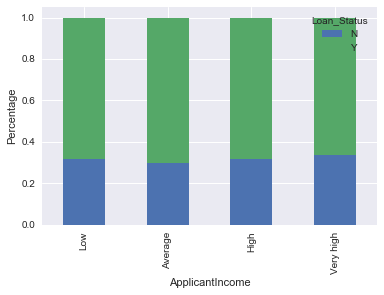

In [32]:
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('ApplicantIncome') 
P = plt.ylabel('Percentage')

In [34]:
bins = [0,1000,3000,4500]
group = ['Low', 'Average', 'High']
train['Coapplicant_Income_bin'] = pd.cut(train['CoapplicantIncome'],bins,labels=group)

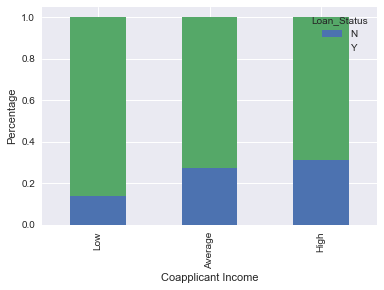

In [37]:
Coapplicant_Income_bin = pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Coapplicant Income')
P= plt.ylabel('Percentage')

In [38]:
train['Total_Income'] = train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group = ['Low','Average','High','Very High']
train['Total_Income_bin'] = pd.cut(train['Total_Income'],bins,labels=group)

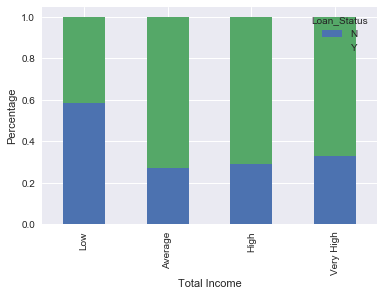

In [39]:
Total_Income_bin = pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel('Total Income')
P=plt.ylabel('Percentage')

In [40]:
bins=[0,100,200,700]
groups = ['Low','Average','High']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=groups)

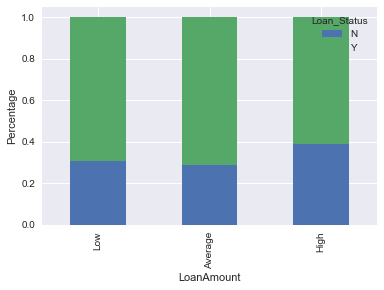

In [41]:
LoanAmount_bin = pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel('LoanAmount')
P=plt.ylabel('Percentage')

In [42]:
train=train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)
train['Dependents'].replace('3+', 3,inplace=True) 
test['Dependents'].replace('3+', 3,inplace=True) 
train['Loan_Status'].replace('N', 0,inplace=True) 
train['Loan_Status'].replace('Y', 1,inplace=True)

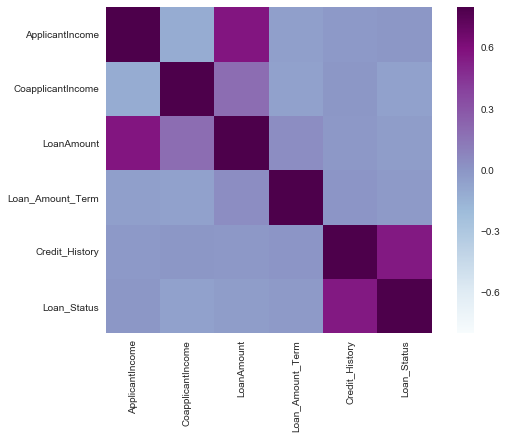

In [44]:
#heatmap to visualize the correlation
matrix = train.corr() 
f, ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

In [45]:
#Missing Value Imputation
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [46]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [47]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [48]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [49]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [50]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [51]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True) 
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

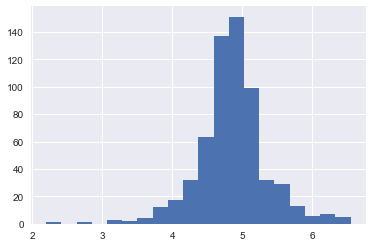

In [52]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log'] = np.log(test['LoanAmount'])

In [53]:
train=train.drop('Loan_ID',axis=1) 
test=test.drop('Loan_ID',axis=1)

In [54]:
X = train.drop('Loan_Status',1) 
y = train.Loan_Status

In [55]:
X=pd.get_dummies(X) 
train=pd.get_dummies(train) 
test=pd.get_dummies(test)

In [56]:
from sklearn.model_selection import train_test_split
X_train, x_cv, y_train, y_cv = train_test_split(X,y,test_size=0.3)

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [62]:
pred_cv = model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.7891891891891892

In [64]:
pred_test = model.predict(test)
solution = pd.read_csv("submission.csv")
solution.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [66]:
solution['Loan_Status']=pred_test
solution['Load_ID']=test_original['Loan_ID']
solution['Loan_Status'].replace(0,'N',inplace=True)
solution['Loan_Status'].replace(1,'Y',inplace=True)

In [70]:
#Stratified k-fold cross validation
from sklearn.model_selection import StratifiedKFold
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = LogisticRegression(random_state=1)     
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)    
    score = accuracy_score(yvl,pred_test)    
    print('accuracy_score',score)    
    i+=1 
    pred_test = model.predict(test) 
    pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.7983870967741935

2 of kfold 5
accuracy_score 0.8306451612903226

3 of kfold 5
accuracy_score 0.8114754098360656

4 of kfold 5
accuracy_score 0.7950819672131147

5 of kfold 5
accuracy_score 0.8278688524590164


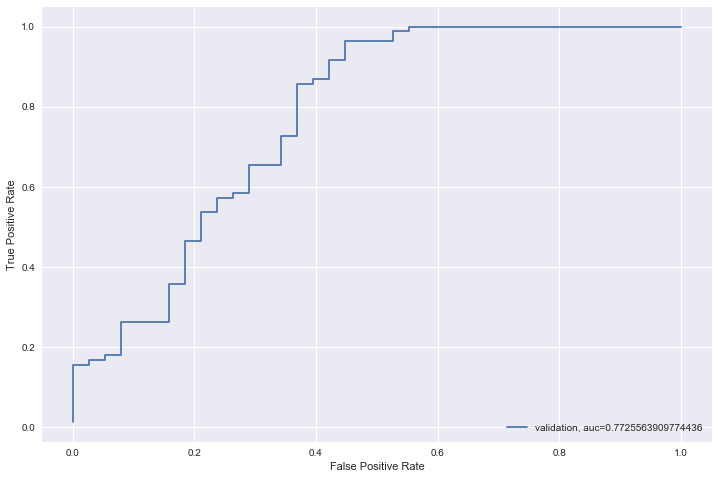

In [72]:
#ROC Curve
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl,pred)
auc = metrics.roc_auc_score(yvl, pred) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="validation, auc="+str(auc)) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

In [73]:
solution['Loan_Status']=pred_test 
solution['Loan_ID']=test_original['Loan_ID']
solution['Loan_Status'].replace(0, 'N',inplace=True) 
solution['Loan_Status'].replace(1, 'Y',inplace=True)

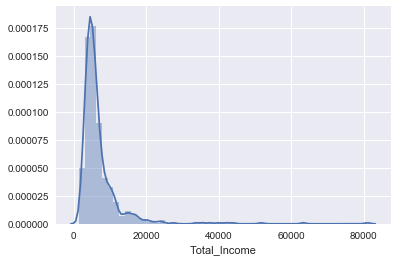

In [77]:
#Feature Engineering
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']
sns.distplot(train['Total_Income'])

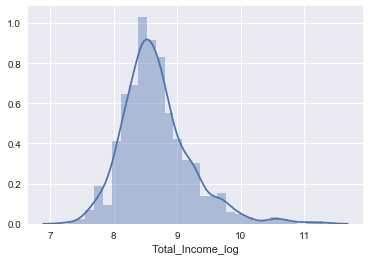

In [78]:
train['Total_Income_log'] = np.log(train['Total_Income']) 
sns.distplot(train['Total_Income_log'])
test['Total_Income_log'] = np.log(test['Total_Income'])

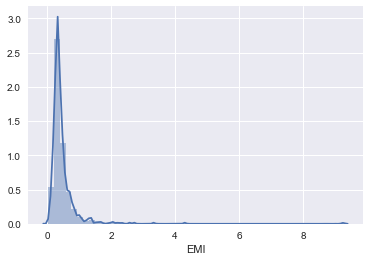

In [80]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term'] 
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']
sns.distplot(train['EMI'])

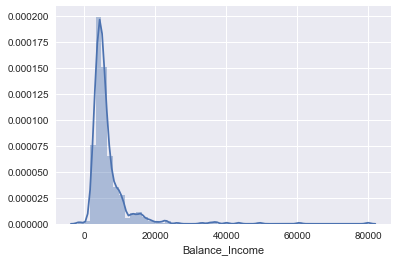

In [82]:
train['Balance_Income']=train['Total_Income']-(train['EMI']*1000)
test['Balance_Income']=test['Total_Income']-(test['EMI']*1000)
sns.distplot(train['Balance_Income'])

In [83]:
train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1) 
test=test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

In [84]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status

In [85]:
#Decision Tree
from sklearn import tree
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = tree.DecisionTreeClassifier(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
    pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.7258064516129032

2 of kfold 5
accuracy_score 0.7419354838709677

3 of kfold 5
accuracy_score 0.7049180327868853

4 of kfold 5
accuracy_score 0.680327868852459

5 of kfold 5
accuracy_score 0.7049180327868853


In [86]:
solution['Loan_Status']=pred_test 
solution['Loan_ID']=test_original['Loan_ID']
# replacing 0 and 1 with N and Y 
solution['Loan_Status'].replace(0, 'N',inplace=True) 
solution['Loan_Status'].replace(1, 'Y',inplace=True)

In [88]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = RandomForestClassifier(random_state=1, max_depth=10)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1
    pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.8225806451612904

2 of kfold 5
accuracy_score 0.8145161290322581

3 of kfold 5
accuracy_score 0.7377049180327869

4 of kfold 5
accuracy_score 0.7295081967213115

5 of kfold 5
accuracy_score 0.8114754098360656


In [90]:
from sklearn.model_selection import GridSearchCV
paramgrid = {'max_depth':list(range(1,20,2)), 'n_estimators':list(range(1,200,20))}
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

In [91]:
from sklearn.model_selection import train_test_split 
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3, random_state=1)

In [92]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19], 'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161, 181]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [93]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=141, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [94]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=141)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1
    pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.8064516129032258

2 of kfold 5
accuracy_score 0.8306451612903226

3 of kfold 5
accuracy_score 0.8032786885245902

4 of kfold 5
accuracy_score 0.7950819672131147

5 of kfold 5
accuracy_score 0.8278688524590164


In [95]:
solution['Loan_Status']=pred_test 
solution['Loan_ID']=test_original['Loan_ID']
# replacing 0 and 1 with N and Y 
solution['Loan_Status'].replace(0, 'N',inplace=True) 
solution['Loan_Status'].replace(1, 'Y',inplace=True)

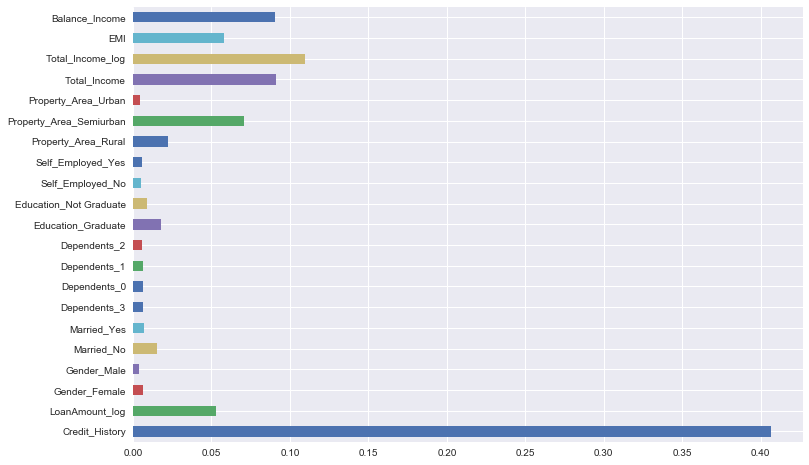

In [96]:
#Feature Importance
importances=pd.Series(model.feature_importances_, index=X.columns) 
importances.plot(kind='barh', figsize=(12,8))

In [105]:
#XGBoost
from xgboost import XGBClassifier
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = XGBClassifier(random_state=1, max_depth=4, n_estimators=50)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1
    pred_test = model.predict(test)



1 of kfold 5


C:\Users\Shivani\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Shivani\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Shivani\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


accuracy_score 0.782258064516129

2 of kfold 5


C:\Users\Shivani\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Shivani\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Shivani\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


accuracy_score 0.8225806451612904

3 of kfold 5
accuracy_score 0.7622950819672131

4 of kfold 5
accuracy_score 0.7459016393442623

5 of kfold 5
accuracy_score 0.7868852459016393


C:\Users\Shivani\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Shivani\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Shivani\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Shivani\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning Fals

In [106]:
solution['Loan_Status']=pred_test 
solution['Loan_ID']=test_original['Loan_ID']
# replacing 0 and 1 with N and Y 
solution['Loan_Status'].replace(0, 'N',inplace=True) 
solution['Loan_Status'].replace(1, 'Y',inplace=True)

In [107]:
solution.head(20)

,Loan_ID,Loan_Status,Load_ID
0,LP001015,Y,LP001015
1,LP001022,Y,LP001022
2,LP001031,Y,LP001031
3,LP001035,Y,LP001035
4,LP001051,Y,LP001051
5,LP001054,Y,LP001054
6,LP001055,Y,LP001055
7,LP001056,N,LP001056
8,LP001059,Y,LP001059
9,LP001067,Y,LP001067
